In [18]:
# LIBRARIES

import pandas as pd
import numpy as np
import yfinance as yf
from prophet import Prophet
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [19]:
# STOCK MARKET DATA

ticker = 'NVDA'  
df = yf.download(ticker, start='2022-01-01', end='2025-01-01')

[*********************100%%**********************]  1 of 1 completed


In [20]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-17,132.990005,133.729996,129.580002,130.979996,130.979996,288504400
2024-06-18,131.139999,136.330002,130.690002,135.580002,135.580002,294335100
2024-06-20,139.800003,140.759995,129.520004,130.779999,130.779999,517768400
2024-06-21,127.120003,130.630005,124.300003,126.570000,126.570000,655484700
2024-06-24,123.239998,124.459999,118.040001,118.110001,118.110001,464374500


In [21]:
# Reset the index to get 'Date' back as a column
df_plot = df.reset_index()

# Select the relevant columns and rename them
df1 = df_plot[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Display the new DataFrame
print(df1)

            ds           y
0   2022-01-03   30.121000
1   2022-01-04   29.290001
2   2022-01-05   27.604000
3   2022-01-06   28.177999
4   2022-01-07   27.247000
..         ...         ...
616 2024-06-17  130.979996
617 2024-06-18  135.580002
618 2024-06-20  130.779999
619 2024-06-21  126.570000
620 2024-06-24  118.110001

[621 rows x 2 columns]


In [22]:
from plotly import express as px
# Plot the data using Plotly
fig = px.line(df1.tail(90), x="ds", y="y", title='Stock Closing Prices by Date')
fig.show()

In [23]:
m = Prophet()

m.fit(df1)

13:35:26 - cmdstanpy - INFO - Chain [1] start processing
13:35:26 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
646,2024-07-20
647,2024-07-21
648,2024-07-22
649,2024-07-23
650,2024-07-24


In [33]:
forecast = m.predict(future)
forecast_40 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(40)

columns = ['yhat', 'yhat_lower', 'yhat_upper']

In [34]:
# Plot the data using Plotly
fig = px.line(forecast_40, x="ds", y=columns, title=f'{ticker} 30 Days Forecast')
fig.show()

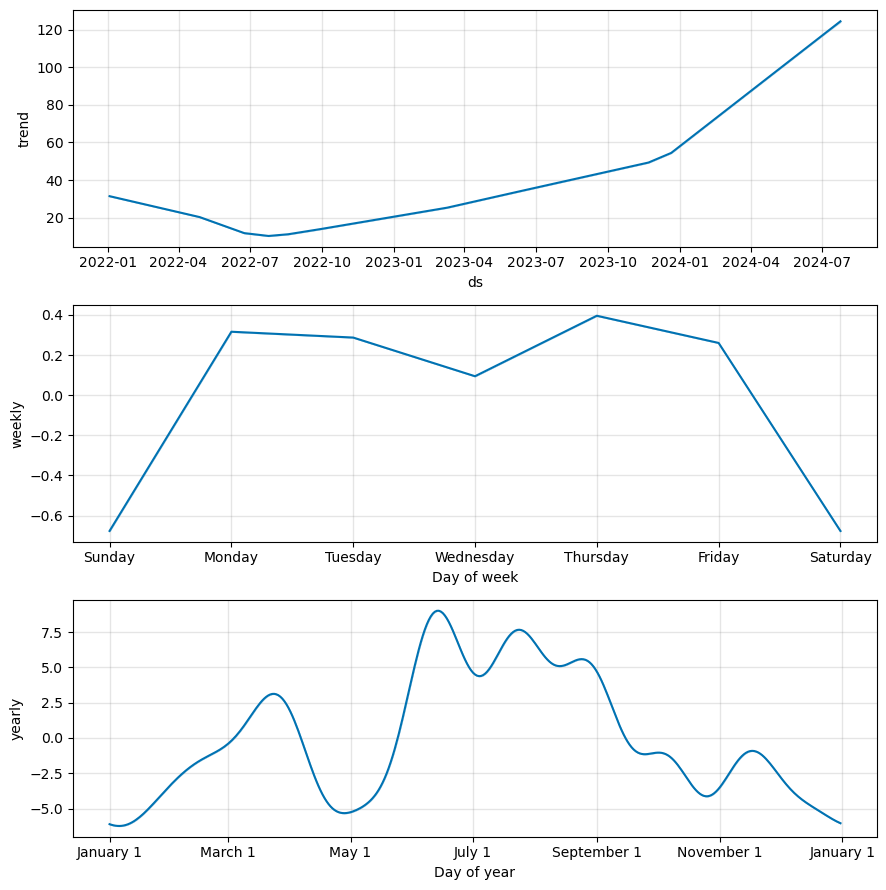

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)